# Tarea - Probabilidad, Ajuste de Modelos y MC

El archivo "data.txt" muestra la distribución de la gente en un andén del metro a lo largo de un día. La estación del metro tiene tres entradas al andén colocadas a 30, 70 y 120 metros, respecto del inicio del andén, el cual mide 150 metros en total.

La distribución se obtuvo contando a todas las personas distribuidas cada 1 metro de principio a fin. De esta forma se obtiene la siguiente distribución con 150 "bins".

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# LaTeX
plt.rc('font', family='serif')
plt.rc('text', usetex=True)

data = np.loadtxt("data.txt",unpack=True)
binscenters  = data[0] # Centro de los bins
muestra      = data[1] # Datos de la distribución
bin_width    = 1 # El conteo se hace cada 1 metro

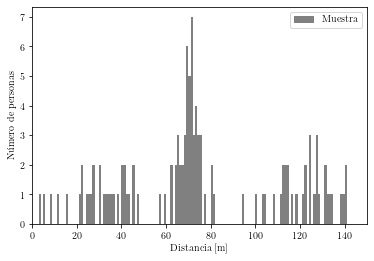

In [2]:
plt.bar(binscenters, muestra, width=bin_width, color='gray', label=r'Muestra')
plt.xlabel("Distancia [m]")
plt.ylabel("Número de personas")
plt.xlim(0,150)
plt.legend()

Esta distribución es una muestra representativa de lo que sucede todos los días a lo largo del año, pero sigue siendo sólo un día el que se muestra. Lo ideal sería realizar el conteo durante todos los días para así tener un estimado de la distribución en el año. Sin embargo, esto último resulta imposible, al menos en la práctica.

Preguntas:

- ¿Cuántas personas hubo en la estación ese día?
- ¿Cuál es la probabilidad de encontrar 1 persona entre los 100 y 110 metros de la estación durante este día?.
- ¿Podrías estimar de alguna forma cuál sería la probabilidad de encontrar 1 persona entre los 100 y 110 metros, pero durante todo el año?
- ¿Cuál es la posición más probable para encontrar a una persona (valor esperado) en el día? ¿Y a lo largo del año?
- ¿Qué conclusiones puedes dar? ¿Es posible dar una estimación correcta de estos resultados a lo largo del año? ¿Qué cambiarías sobre tus suposiciones

Tips:

1) Supón todo lo que tengas que suponer, pero arguméntalo.

2) Usa cualquiera de las cosas que hayamos visto (checa los notebooks Probabilidad.ipynb, Pi_Estimation.ipynb, Ajuste de Modelo - MC.ipynb).

3) Es conveniente ajustar un modelo a los datos.

4) Nota que la distribución que tienes no está normalizada, por lo que no es una PDF todavía.

5) Recuerda que 
$$ 
\int_0^{150} p(x) \, \mathrm{d}x = 1.
$$
6) Calcula la función acumulativa (CDF). Esta función debe valer 1 en 150, con esto sabrás si tu PDF está bien normalizada.

7) Para las preguntas sobre cuál sería la probabilidad a lo largo del año, te recomiendo realizar 365 simulaciones Monte Carlo (una por cada día del año) asumiendo una distribución que se acople a los datos que tienes (punto 3) y obteniendo una muestra distinta (sample, distribución) de N personas para cada día. Puedes asumir que cada día hay la misma cantidad N de personas o, si quieres, asumir una forma más complicada como, por ejemplo, que en días festivos no hay tanta gente como en un viernes de quincena, o simplemente asumir más personas.

In [3]:
muestra

array([0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 2., 0., 1., 1., 1., 2., 0., 0., 2., 0., 1., 1.,
       1., 1., 1., 0., 1., 0., 2., 2., 1., 1., 0., 2., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 2., 0., 2., 3., 2., 2.,
       3., 6., 5., 7., 3., 4., 3., 3., 0., 1., 0., 0., 2., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 2., 2., 2., 0., 1., 0., 1.,
       0., 0., 1., 2., 0., 3., 0., 1., 3., 1., 0., 0., 2., 1., 1., 1., 0.,
       0., 0., 1., 1., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [4]:
Num_personas = 0
for i in range(len(muestra)):
    Num_personas += muestra[i]
    
print(Num_personas)

115.0


In [5]:
np.sum(muestra)

115.0

$$
\frac{1}{Num_{personas}}\sum_{100}^{110} muestra[i] = \sum_{i=100}^{110} P_i \approx \int_{100}^{110} p(x) dx
$$

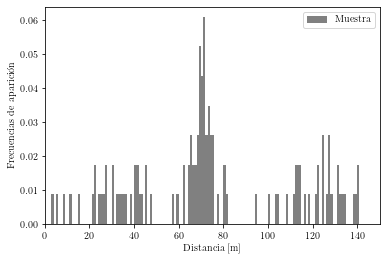

In [8]:
# Definimos la PDF
pdf = muestra/Num_personas
plt.bar(binscenters, pdf, width=bin_width, color='gray', label=r'Muestra')
plt.xlabel("Distancia [m]")
plt.ylabel("Frecuencias de aparición")
plt.xlim(0,150)
plt.legend()

In [10]:
# Sumar los elementos de la pdf entre x = 100 y 110.
# Un loop que recorra sobre los binscenters.
# Y si binscenter[i] está entre 100 y 110. Sumar la PDF 
# para obtener la probabilidad.
# .
# .
# .
# ~0.05=5%

SyntaxError: invalid syntax (<ipython-input-10-0561ebbf9cde>, line 5)

In [18]:
# Ajustar un modelo usando curve_fit
# Modificar esto.

def gauss(x, A, mu, sigma):
    return (A * np.exp(-1.0 * (x - mu)**2 / (2 * sigma**2)))

def gauss2(x, A, mu1, sigma1, B, mu2, sigma2):
    return (A * np.exp(-1.0 * (x - mu1)**2 / (2 * sigma1**2)) + B * np.exp(-1.0 * (x - mu2)**2 / (2 * sigma2**2)))

In [26]:
from scipy.optimize import curve_fit

p0 = [0.05,70,30] # Priors del ajuste (A,mu,sigma)
params1, pcov = curve_fit(gauss, xdata=binscenters, ydata=pdf, p0=p0)

p0 = [0.05,70,30,0.01,120,10] # Priors del ajuste (A,mu,sigma)
params2, pcov = curve_fit(gauss2, xdata=binscenters, ydata=pdf, p0=p0)

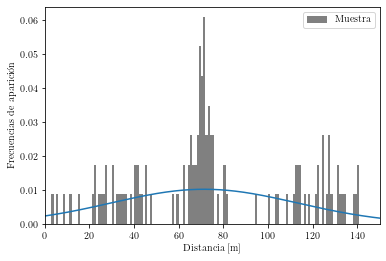

In [27]:
x = np.linspace(0,150,1500)
plt.bar(binscenters, pdf, width=bin_width, color='gray', label=r'Muestra')
plt.plot(x,gauss(x,*params1))
plt.xlabel("Distancia [m]")
plt.ylabel("Frecuencias de aparición")
plt.xlim(0,150)
plt.legend()

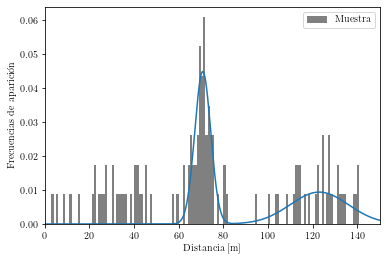

In [28]:
x = np.linspace(0,150,1500)
plt.bar(binscenters, pdf, width=bin_width, color='gray', label=r'Muestra')
plt.plot(x,gauss2(x,*params2))
plt.xlabel("Distancia [m]")
plt.ylabel("Frecuencias de aparición")
plt.xlim(0,150)
plt.legend()

In [29]:
x = np.linspace(0,150,1500)
pdf_fit = gauss2(x,*params2)
# Sumar los elementos de la pdf entre x = 100 y 110.
# Un loop que recorra sobre los binscenters.
# Y si x[i] está entre 100 y 110. Sumar la PDF_fit 
# para obtener la probabilidad.
# .
# .
# .
# ~0.05=5%

In [30]:
# Calculamos la CDF a partir de la distribución y normalizamos para obtener la PDF.
cdf = []
        
dumb = 0
for i in np.arange(len(x)):
    dumb += pdf_fit[i]*(x.max()-x.min())/len(x)
    cdf.append(dumb)

# Normalizamos nuestra distribución y calculamos PDF y CDF.
norm = dumb
#pdf = dist_pdf/norm
cdf = np.array(cdf)/norm

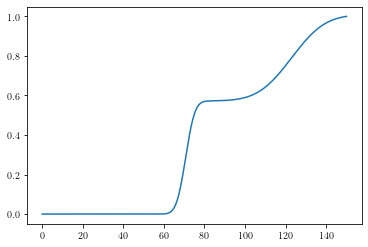

In [31]:
plt.plot(x,cdf)

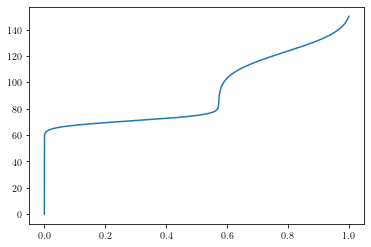

In [119]:
plt.plot(cdf,x)

In [106]:
def gauss_real(x,mu, sigma):
    return (np.exp(-1.0 * (x - mu)**2 / (2 * sigma**2))/np.sqrt(2.0*np.pi*sigma**2))

(0.0, 10.0)

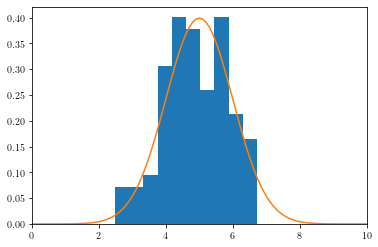

In [118]:
pdf_gauss = np.random.normal(5,1,size=100) # --> Para tiradas MC
plt.hist(pdf_gauss,density=True)
plt.plot(x,gauss_real(x,5,1))
plt.xlim(0,10)

In [132]:
from scipy import interpolate

# Interpolamos de manera inversa para obtener f = CDF⁻¹
f = interpolate.interp1d(cdf,x,kind='cubic')

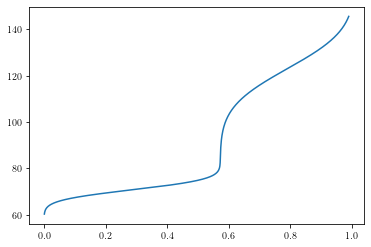

In [135]:
x = np.linspace(0.001,0.99,1000)
plt.plot(x,f(x))

In [143]:
x_new = np.random.uniform(0.005,0.999,size=115)
sample = f(x_new)

<BarContainer object of 150 artists>

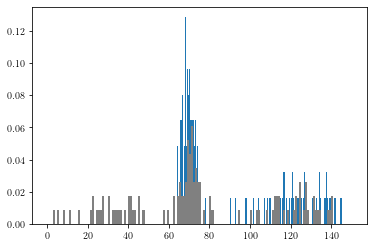

In [144]:
plt.hist(sample,bins=150,density=True)
plt.bar(binscenters, pdf, width=bin_width, color='gray', label=r'Muestra')

In [ ]:
# ¿Cómo calcularian para los 365 días del año?
# Empieza el MC
n_sim = 365
for i in range(n_sim):
    x_sim = np.random.uniform(0,1,size=115) # ojo, esto es otro prior porque no tiene que ser uniforme
    y_gen = f(x_sim) # Simulan distribuciones distintas siguiendo un prior f -> Muestre siguiendo distribución
                     # 2 gaussianas 